In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#img = cv2.imread("image.jpg")

In [6]:
#plt.imshow(img)

In [7]:
#cap = cv2.VideoCapture('video.mp4')

In [8]:
#cv2.line(img, (0, 0), (100, 100), (255, 0, 0), 5)

In [9]:
#cv2.rectangle(img, (0, 0), (100, 100), (0, 255, 0), 5)

In [10]:
#cv2.circle(img, (50, 50), 50, (0, 0, 255), 5)

In [11]:
#pts = np.array([[10, 5], [20, 30], [70, 20], [50, 10]], np.int32)
#pts = pts.reshape((-1, 1, 2))
#cv2.polylines(img, [pts], True, (0, 255, 255), 5)

In [12]:
#cv2.putText(img, 'Hello World!', (0, 130), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

**Line Detection**

In [13]:
#gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert to grayscale
#edges = cv2.Canny(gray, 50, 150, apertureSize=3) # detect edges
# Inreasing aperture size increases the number of lines that are detected

# edges is image in grayscale with min and max brightness and aperture size (the amount of light that the image is exposed to)
# 1 represents the parameter resolution in pixels. This makes the resolution 1 pixel
# theta represents the parameter resolution in radians. This makes the resolution np.pi/180 radians
# threshold represents the minimum number of intersections required for a line to be considered a line. This is set to 100
# minLineLength is the minimum length for a line segment to be considered a line
# maxLineGap is the maximum allowed gap between line segments to treat them as a single line
#lines = cv2.HoughLinesP(
                #edges,
                #1,
                #np.pi/180,
                #100,
                #minLineLength=100,
                #maxLineGap=10,
        #) # detect lines

#for line in lines:
    #x1, y1, x2, y2 = line[0]
    #cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

#plt.imshow(img)

In [14]:
#image = cv2.imread("pool_lanes.png")

In [15]:
#gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # convert to grayscale
#edges = cv2.Canny(gray, 100, 150, apertureSize=3) # detect edges
# Inreasing aperture size increases the number of lines that are detected

# edges is image in grayscale with min and max brightness and aperture size (the amount of light that the image is exposed to)
# 1 represents the parameter resolution in pixels. This makes the resolution 1 pixel
# theta represents the parameter resolution in radians. This makes the resolution np.pi/180 radians
# threshold represents the minimum number of intersections required for a line to be considered a line. This is set to 100
# minLineLength is the minimum length for a line segment to be considered a line
# maxLineGap is the maximum allowed gap between line segments to treat them as a single line
#lines = cv2.HoughLinesP(
                #edges,
                #1,
                #np.pi/180,
                #200,
                #minLineLength=100,
                #maxLineGap=5,
        #) # detect lines

#for line in lines:
    #x1, y1, x2, y2 = line[0]
    #cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

#plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [16]:
#vcap = cv2.VideoCapture("rtsp://10.29.17.108:8554/test")
#ret, frame = vcap.read()

In [17]:
#plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

**Edge detection for middle lane/line of pool image**

In [18]:
pool = cv2.imread("rov_pool.jpg")

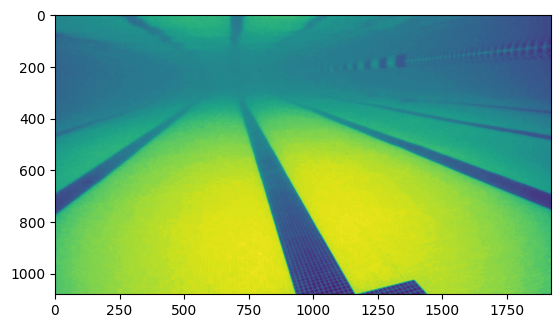

In [19]:
gray = cv2.cvtColor(pool, cv2.COLOR_BGR2GRAY) # convert to grayscale
plt.imshow(gray)

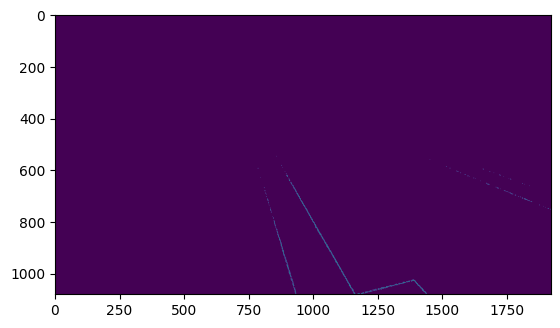

In [20]:

edges = cv2.Canny(gray, 106, 107, apertureSize=3) # detect edges
# Inreasing aperture size increases the number of lines that are detected
plt.imshow(edges)

3.282758620689655
1.7355072463768115


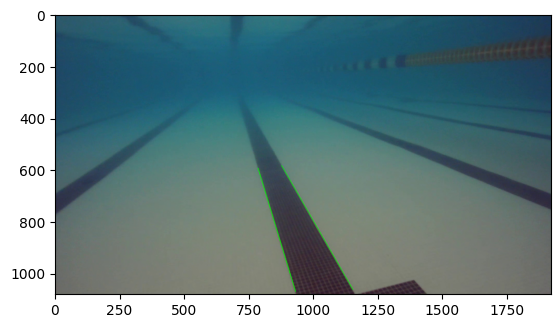

In [21]:
# edges is image in grayscale with min and max brightness and aperture size (the amount of light that the image is exposed to)
# 1 represents the parameter resolution in pixels. This makes the resolution 1 pixel
# theta represents the parameter resolution in radians. This makes the resolution np.pi/180 radians
# threshold represents the minimum number of intersections required for a line to be considered a line. This is set to 100
# minLineLength is the minimum length for a line segment to be considered a line
# maxLineGap is the maximum allowed gap between line segments to treat them as a single line
lines = cv2.HoughLinesP(
                edges,
                1,
                np.pi/180,
                60, #Min number of intersections
                minLineLength=475,
                maxLineGap=100,
        ) # detect lines

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(pool, (x1, y1), (x2, y2), (0, 255, 0), 2)
    print((y2-y1)/(x2-x1))

plt.imshow(cv2.cvtColor(pool, cv2.COLOR_BGR2RGB))

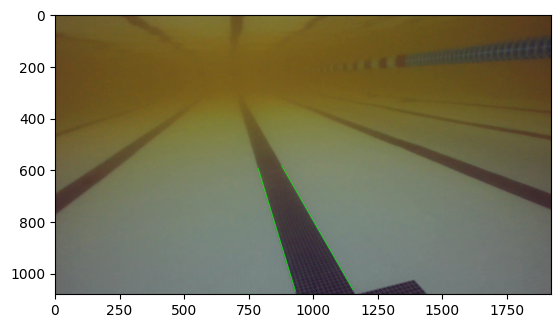

In [22]:
plt.imshow(pool)

**Edge/line detection with video**

In [23]:
def drawLines(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 90, 100, apertureSize=3) 
    lines = cv2.HoughLinesP(
                    edges, #described above
                    1, #1 pixel resolution parameter
                    np.pi/180, # 1 degree resolution parameter
                    10, #min number of intersections/votes
                    minLineLength=10,
                    maxLineGap=60,
            ) # detect lines
    try:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            slope = (y2-y1)/(x2-x1)
            print(str(slope))
    except TypeError:
        pass
    
    return img

In [24]:
video = cv2.VideoCapture('AUV_Vid.mkv')

fps = int(video.get(cv2.CAP_PROP_FPS))
width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))

output_file = 'output_video.avi'
fourcc = cv2.VideoWriter_fourcc(*'XVID')
output_video = cv2.VideoWriter(output_file, fourcc, 30, (width, height))

ret, frame = video.read()
count = 0
frequency = 1

while ret:
    if count % frequency == 0:
        processed_frame = drawLines(frame)
        output_video.write(processed_frame)

    count += 1
    ret, frame = video.read()

video.release()
output_video.release()

0.423963133640553
0.4233128834355828
1.9603174603174602
0.421259842519685
1.9666666666666666
4.8125
0.36
1.96875
4.416666666666667
1.9609375
0.4246575342465753
0.3333333333333333
0.35294117647058826
0.4219269102990033
1.9649122807017543
0.42441860465116277
1.9509803921568627
1.9646017699115044
0.36470588235294116
4.25
0.3829787234042553
0.4444444444444444
0.34615384615384615
5.0625
0.4444444444444444
0.3695652173913043
0.42592592592592593
1.9696969696969697
0.42316258351893093
1.9649122807017543
1.971698113207547
0.4234527687296417
0.36401673640167365
1.9610389610389611
0.421875
4.8
0.3626373626373626
1.9649122807017543
4.166666666666667
1.9639639639639639
0.4224137931034483
1.9519230769230769
0.3656957928802589
0.4198895027624309
1.9642857142857142
1.9651162790697674
0.43478260869565216
4.2
0.4051724137931034
4.416666666666667
1.9672131147540983
0.4066666666666667
1.9540229885057472
0.40875912408759124
0.34615384615384615
1.9534883720930232
1.9639639639639639
0.358974358974359
0.36470

/tmp/ipykernel_1095/2437711148.py:16: RuntimeWarning: divide by zero encountered in scalar divide
  slope = (y2-y1)/(x2-x1)


2.3516483516483517
2.358974358974359
6.2631578947368425
6.176470588235294
2.343283582089552
2.378787878787879
2.34375
6.352941176470588
2.260869565217391
2.257425742574257
2.2421052631578946
6.346153846153846
2.2545454545454544
2.2555555555555555
6.411764705882353
8.0
2.357142857142857
2.36
2.3417721518987342
6.407407407407407
6.269230769230769
2.3544303797468356
6.3125
2.36
2.263157894736842
8.133333333333333
2.276595744680851
2.2653061224489797
2.235294117647059
6.666666666666667
7.222222222222222
7.75
2.2758620689655173
2.2526315789473683
2.3488372093023258
2.3620689655172415
7.95
2.3626373626373627
8.166666666666666
7.208333333333333
7.909090909090909
2.2551020408163267
8.105263157894736
2.257142857142857
10.125
2.255813953488372
8.5
2.269230769230769
2.6470588235294117
2.260869565217391
8.133333333333333
8.333333333333334
2.360544217687075
2.3564356435643563
2.3524590163934427
2.346774193548387
7.1891891891891895
7.25
7.32
7.148148148148148
2.3515625
2.357142857142857
8.2083333333

KeyboardInterrupt: 

In [ ]:
cap = cv2.VideoCapture('AUV_Vid.mkv')

In [ ]:
ret, frame = cap.read()

In [ ]:
len(frame)

In [ ]:
count = 0
frequency = 150
while ret:
    if count%frequency == 0:
        plt.imshow(cv2.cvtColor(drawLines(frame), cv2.COLOR_BGR2RGB))
        plt.show()

    count+=1
    ret, frame = cap.read()

**April Tags**

In [ ]:
from dt_apriltags import Detector

In [ ]:
img = cv2.imread('test_image.png', cv2.IMREAD_GRAYSCALE)

In [ ]:
at_detector = Detector(families='tag36h11',
                       nthreads=1,
                       quad_decimate=1.0,
                       quad_sigma=0.0,
                       refine_edges=1,
                       decode_sharpening=0.25,
                       debug=0)

In [ ]:
tags = at_detector.detect(img, estimate_tag_pose=False, camera_params=None, tag_size=None)

In [ ]:
color_img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

In [ ]:
for tag in tags:
    for idx in range(len(tag.corners)):
        cv2.line(color_img, tuple(tag.corners[idx - 1, :].astype(int)), tuple(tag.corners[idx, :].astype(int)), (0, 255, 0))

    cv2.putText(color_img, str(tag.tag_id),
                org=(tag.corners[0, 0].astype(int) + 10, tag.corners[0, 1].astype(int) + 10),
                fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                fontScale=0.8,
                color=(0, 0, 255))

In [ ]:
plt.imshow(img)